In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt5
# Add modules to the path
import sys
#sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos\\Python_git')
#sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos')
#sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos\\Python_git\\freely_moving_photometry_analysis' )
sys.path.insert(1, '/home/matthew/Documents/code/photometry_analysis_code/freely_moving_photometry_analysis')

import joypy
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.signal import decimate
from utils.plotting import HeatMapParams
from utils.plotting import heat_map_and_mean, plot_one_side, calculate_error_bars
from utils.plotting import get_photometry_around_event
from scipy import stats
from utils.individual_trial_analysis_utils import ZScoredTraces, SessionData, CueAlignedData, CueAlignedSidedData, ChoiceAlignedData

In [55]:
mouse = 'SNL_photo59'
date = '20211007'
saving_folder = '/mnt/winstor/swc/sjones/users/francesca/photometry_2AC/processed_data/' + mouse + '/'
restructured_data_filename = mouse + '_' + date + '_' + 'restructured_data.pkl'
trial_data = pd.read_pickle(saving_folder + restructured_data_filename) 

In [56]:
demod_signal = np.load(saving_folder + mouse + '_' + date + "_smoothed_signal.npy" )

In [57]:
plt.plot(demod_signal)

In [5]:
demod_signal.shape

(51260000,)

In [2]:
class CustomAlignedData(object):
    def __init__(self, session_data, params):
        saving_folder = '/mnt/winstor/swc/sjones/users/francesca/photometry_2AC/processed_data/' + session_data.mouse + '/'
        #saving_folder = 'C:\\Users\\francescag\\Documents\\PhD_Project\\SNL_photo_photometry\\processed_data' + session_data.mouse + '\\'
        restructured_data_filename = session_data.mouse + '_' + session_data.date + '_' + 'restructured_data.pkl'
        trial_data = pd.read_pickle(saving_folder + restructured_data_filename)
        dff_trace_filename = session_data.mouse + '_' + session_data.date + '_' + 'smoothed_signal.npy'
        dff = np.load(saving_folder + dff_trace_filename)

        fiber_options = np.array(['left', 'right'])
        fiber_side_numeric = (np.where(fiber_options == session_data.fiber_side)[0] + 1)[0]
        contra_fiber_side_numeric = (np.where(fiber_options != session_data.fiber_side)[0] + 1)[0]

        self.ipsi_data = ZScoredTraces(trial_data, dff, params, fiber_side_numeric, 0)
        #self.ipsi_data.get_peaks()
        self.contra_data = ZScoredTraces(trial_data, dff,params, contra_fiber_side_numeric, 0)
        #self.contra_data.get_peaks()

In [3]:
def get_all_experimental_records():
    experiment_record = pd.read_csv('/mnt/winstor/swc/sjones/users/francesca/photometry_2AC/experimental_record_matt.csv')
    experiment_record['date'] = experiment_record['date'].astype(str)
    return experiment_record

In [10]:
def open_experiment(experiment_to_add):
    for index, experiment in experiment_to_add.iterrows():
        saving_folder = '/mnt/winstor/swc/sjones/users/francesca/photometry_2AC/processed_data/' + experiment['mouse_id'] + '/'
        #saving_folder = 'C:\\Users\\francescag\\Documents\\PhD_Project\\SNL_photo_photometry\\processed_data' + experiment['mouse_id']  + '\\'
        restructured_data_filename = experiment['mouse_id'] + '_' + experiment['date'] + '_' + 'restructured_data.pkl'
        trial_data = pd.read_pickle(saving_folder + restructured_data_filename)
        dff_trace_filename = experiment['mouse_id'] + '_' + experiment['date'] + '_' + 'smoothed_signal.npy'
        dff = np.load(saving_folder + dff_trace_filename)
        session_traces = SessionData(experiment['fiber_side'], experiment['recording_site'], experiment['mouse_id'], experiment['date'])
    return session_traces

In [61]:
mouse_id = 'SNL_photo58'
date = '20210924'
all_experiments = get_all_experimental_records()
experiment_to_process = all_experiments[(all_experiments['date'] == date) & (all_experiments['mouse_id'] == mouse_id)]
session_data = open_experiment(experiment_to_process)

In [40]:
saving_folder = '/mnt/winstor/swc/sjones/users/francesca/photometry_2AC/processed_data/' + mouse_id + '/'
#saving_folder = 'C:\\Users\\francescag\\Documents\\PhD_Project\\SNL_photo_photometry\\processed_data' + session_data.mouse + '\\'
restructured_data_filename = mouse_id + '_' + date + '_' + 'restructured_data.pkl'
trial_data = pd.read_pickle(saving_folder + restructured_data_filename)

In [41]:
trial_data.shape

(3788, 17)

In [62]:

params = {'state_type_of_interest': 3, # 5.5 = first incorrect choice
    'outcome': 1, # correct or incorrect: 0 = incorrect, 1 = correct, 2 = both
    'last_outcome': 0,  # NOT USED CURRENTLY
    'no_repeats' : 1, # 0 = dont care, 1 = state only entered once,
    'last_response': 0, # trial before: 0 = dont care. 1 = left, 2 = right
    'align_to' : 'Time start', # time end or time start
    'instance': -1, # only for no repeats = 0, -1 = last instance, 1 = first instance
    'plot_range': [-6, 6],
    'first_choice_correct': 1, # useful for non-punished trials 0 = dont care, 1 = only correct trials, (-1 = incorrect trials)
    'cue': None}
test = CustomAlignedData(session_data, params)

(4422, 17)
(4422, 17)


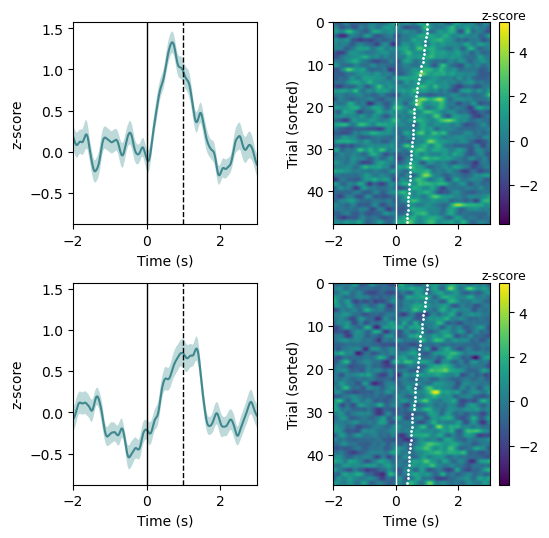

In [63]:
heat_map_and_mean(test, sort=True, error_bar_method='sem', mean_across_mice=False, cue_vline=1, xlims=[-2,3])

,Trial num,Trial type,State type,Instance in state,Max times in state,State name,Time start,Time end,Response,Last response,Last outcome,Trial start,Trial end,Trial outcome,First response,Reward block,First choice correct
0,0.0,7.0,1.0,1.0,1.0,TrialStart,12.4975,12.5075,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
1,0.0,7.0,2.0,1.0,176.0,WaitForPoke,12.5075,79.5633,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
2,0.0,7.0,3.0,1.0,176.0,CueDelay,79.5633,79.5635,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
3,0.0,7.0,2.0,2.0,176.0,WaitForPoke,79.5635,79.5636,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
4,0.0,7.0,3.0,2.0,176.0,CueDelay,79.5636,80.1309,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
5,0.0,7.0,2.0,3.0,176.0,WaitForPoke,80.1309,80.1310,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
6,0.0,7.0,3.0,3.0,176.0,CueDelay,80.1310,80.1311,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
7,0.0,7.0,2.0,4.0,176.0,WaitForPoke,80.1311,80.1312,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
8,0.0,7.0,3.0,4.0,176.0,CueDelay,80.1312,80.1313,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0
9,0.0,7.0,2.0,5.0,176.0,WaitForPoke,80.1313,83.0166,2.0,-1.0,-1.0,12.4975,584.8173,1.0,2.0,0.0,1.0


# Analysis looking at sidedness vs cue id for Nacc


In [2]:
mouse_id = 'SNL_photo30'
date = '20201209'

In [3]:
cue_test = SessionData('left', 'Nacc', mouse_id, date)

In [4]:
cue_test_ev = CueAlignedSidedData(cue_test)

(586, 17)
(245, 160000)
(439, 17)
(246, 160000)
(586, 17)
(4, 160000)
(439, 17)
(239, 160000)
(586, 17)
(241, 160000)
(439, 17)
(7, 160000)


In [5]:
from utils.plotting import plot_one_side

In [6]:
ipsi_low = cue_test_ev.low_cue_ipsi_data
contra_low = cue_test_ev.low_cue_contra_data
ipsi_high = cue_test_ev.high_cue_ipsi_data
contra_high = cue_test_ev.high_cue_contra_data

In [357]:
light_pink = '#FFADCD'
light_blue = '#9BCFFD'
dark_pink = '#FF478B'
dark_blue = '#1F93FF'
fig1, ax1 = plt.subplots(1,1)
time_points = decimate(ipsi_low.time_points, 10)
mean_trace = decimate(ipsi_low.mean_trace, 10)
traces = decimate(ipsi_low.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='ipsi low', color=light_blue)

mean_trace = decimate(contra_low.mean_trace, 10)
traces = decimate(contra_low.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='contra low', color=dark_blue)

mean_trace = decimate(ipsi_high.mean_trace, 10)
traces = decimate(ipsi_high.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='ipsi high', color=dark_pink)

mean_trace = decimate(contra_high.mean_trace, 10)
traces = decimate(contra_high.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='contra high', color=light_pink)
plt.legend()



In [351]:
fig, axs = plt.subplots(nrows=4, ncols=2)
plot_one_side(ipsi_low, fig, axs[0,0], axs[0, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(contra_high, fig, axs[1,0], axs[1, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(ipsi_high, fig, axs[2,0], axs[2, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(contra_low, fig, axs[3,0], axs[3, 1], error_bar_method=None, sort=True, white_dot='reward')


In [7]:
import seaborn as sns

In [8]:
a = decimate(ipsi_low.sorted_traces, 10)

In [9]:
time_points = decimate(ipsi_low.time_points, 10)

In [ ]:
sns.heatmap(a, xticklabels=time_points)

In [14]:
a.shape

(241, 16000)

In [15]:
time_points = decimate(ipsi_low.time_points, 10)